# Postprocessing notebook for mizuRoute Hanasaki test simulations
postprocessing from Cheyenne

Inne Vanderkelen - March 2021

In [52]:
# import modules
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
# get reservoir
reservoir_name = 'Waterton' # possible to replace by: Dickson, Bhumiboi, Waterton, Glen_canyon, Sirikit
reservoir_name = 'Bhumiboi' # possible to replace by: Dickson, Bhumiboi, Waterton, Glen_canyon, Sirikit
reservoir_name = 'Glen_canyon' # possible to replace by: Dickson, Bhumiboi, Waterton, Glen_canyon, Sirikit
#reservoir_name = 'Waterton' # possible to replace by: Dickson, Bhumiboi, Waterton, Glen_canyon, Sirikit


In [80]:
# load observations and python code results
df_Shervan = pd.read_csv('Hanasaki_Shervan_'+reservoir_name+'.csv')
df_Shervan ['timed']= pd.to_datetime(df_Shervan.timed)
df_Shervan = df_Shervan.set_index(['timed'])

In [81]:
# define directories
outdir = '/glade/work/ivanderk/mizuRoute_test/route/'

# save simulation periods for test cases
years = {'Dickson'   : range(2005,2011),
        'Waterton'   : range(2000,2011), 
        'Sirikit'    : range(1980,1996), 
        'Glen_canyon': range(1980,1996), 
        'Bhumiboi'   : range(1980,1996)}



In [82]:
# load output file name (Dickson)

datasets =  []
for year in years[reservoir_name]:
    fn_out = outdir +"output/hybrid_test_"+reservoir_name+".mizuRoute.h."+str(year)+"-01-01-00000.nc"
    ds_year = xr.open_dataset(fn_out)
    datasets.append(ds_year)

ds = xr.concat(datasets, dim='time')

In [83]:
# load river topology file
fn_topo = outdir+'ancillary_data/network_topology_'+reservoir_name+'.nc'

ds_topo = xr.open_dataset(fn_topo)

In [84]:
# set plotting parameters
def set_plot_param():
    """Set my own customized plotting parameters"""
    
    import matplotlib as mpl
    mpl.rc('xtick',labelsize=16)
    mpl.rc('ytick',labelsize=16)
    mpl.rc('axes',titlesize=18)
    mpl.rc('axes',labelsize=16)
    mpl.rc('axes',edgecolor='grey')
    mpl.rc('grid', color='lightgray')
    mpl.rc('legend',fontsize=16, frameon=False)
set_plot_param()

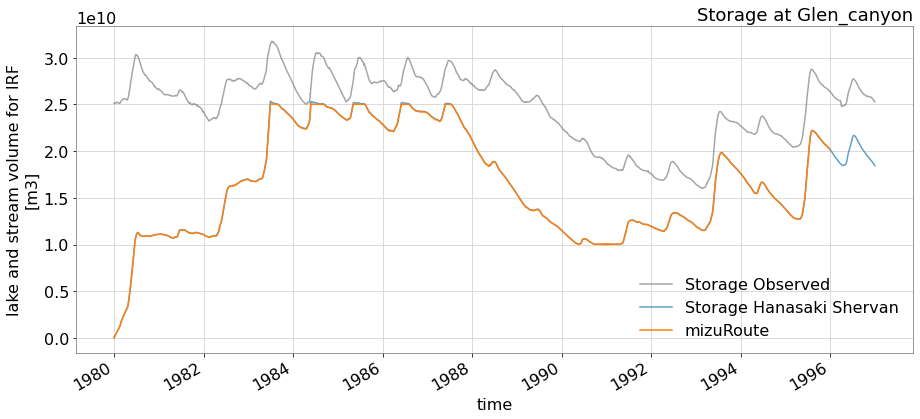

In [85]:
# storage
storage = ds.IRFlakeVol

fig, axs = plt.subplots(1,1,figsize=(15,6))
plt.plot(df_Shervan.index, df_Shervan.Storage_Observed, color="gray", label = "Storage Observed", alpha=0.7)
plt.plot(df_Shervan.index, df_Shervan.Storage_Hanasaki, label = "Storage Hanasaki Shervan", alpha=0.7)
storage[:,1].plot(label='mizuRoute')

plt.legend(); 
plt.title('Storage at '+reservoir_name, loc='right'); 
plt.grid()

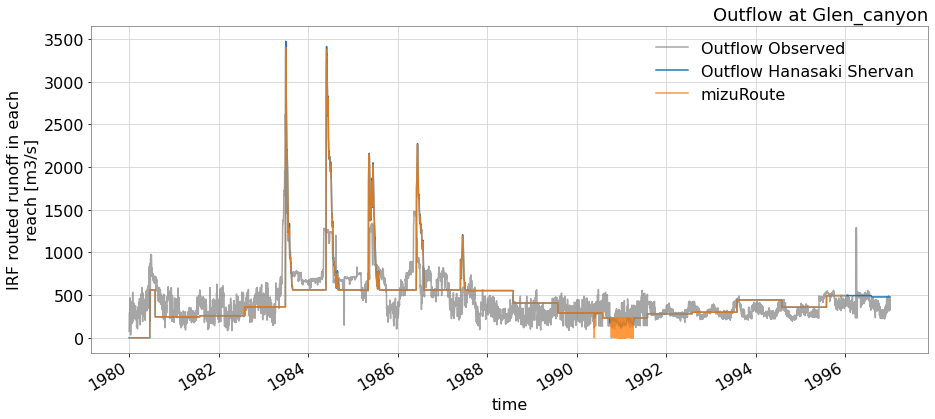

In [88]:
# storage
runoff = ds.IRFroutedRunoff    

fig, axs = plt.subplots(1,1,figsize=(15,6))
plt.plot(df_Shervan.index, df_Shervan.Outflow_Observed, color="gray", label = "Outflow Observed", alpha = 0.7)
plt.plot(df_Shervan.index, df_Shervan.Outflow_Hanasaki, label = "Outflow Hanasaki Shervan")
runoff[:,1].plot(label='mizuRoute', alpha=0.8)

plt.title('Outflow at '+reservoir_name, loc='right'); 
plt.legend(); 
plt.grid()


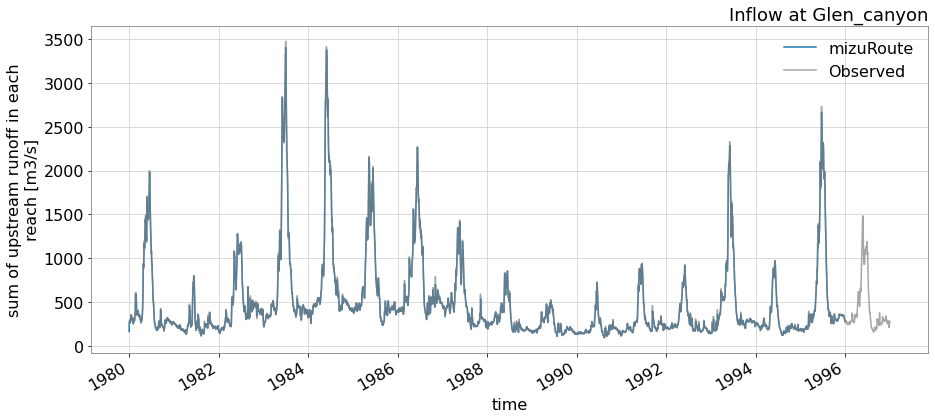

In [91]:
# storage
fig, axs = plt.subplots(1,1,figsize=(15,6))

inflow = ds.sumUpstreamRunoff      
inflow[:,1].plot(label='mizuRoute')
plt.plot(df_Shervan.index, df_Shervan.Inflow_Observed, color="gray", label = "Observed", alpha=0.7)

#runoff[:,1].plot(label='lake')
#runoff[:,2].plot(label='downstream')
plt.title('Inflow at '+reservoir_name, loc='right'); 
plt.legend(); 
plt.grid()